In [1]:
!rm -rf /tmp/ImageNetTrainTransfer

In [2]:
#Import
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import random
from PIL import Image
#Inception preprocessing code from https://github.com/tensorflow/models/blob/master/slim/preprocessing/inception_preprocessing.py
#useful to maintain training dimension
from utils import inception_preprocessing
import sys

#from inception import inception
'''
Uso di slim e nets_factory (come per SLIM Tensorflow https://github.com/tensorflow/models/blob/master/slim/train_image_classifier.py)
per il ripristino della rete. 

Le reti devono essere censite in nets_factory (v. struttura file nella directory di questo notebook)
'''

slim = tf.contrib.slim
from nets import nets_factory

In [3]:
#GLobal Variables
SAMPLE_IMAGE_NET_ROOT_DIR ='/var/ifs/data/hadoop-cloudera5/notebookDir/HUB/lgrazioli/ILSVRC Analysis/SMALL_ILSVRC/'
IMAGE_DF_PATH = SAMPLE_IMAGE_NET_ROOT_DIR + 'images_df.csv'
#Global Variables
IMAGE_NET_ROOT_PATH = '/var/ifs/data/tiny-imagenet-200/'
#IMAGE_NET_ROOT_PATH = '/data/lgrazioli/'
IMAGE_NET_LABELS_PATH = IMAGE_NET_ROOT_PATH + 'words.txt'
IMAGE_NET_TRAIN_PATH = IMAGE_NET_ROOT_PATH + 'train/'
TRAINING_CHECKPOINT_DIR = '/tmp/ImageNetTrainTransfer'
#Transfer learning CHECKPOINT PATH
#File ckpt della rete
CHECKPOINT_PATH = '/var/ifs/data/model-zoo/inceptionv4/tensorflow-1.2/inception_v4.ckpt'

In [4]:
#Reading Images Dataframe
images_df = pd.read_csv(IMAGE_DF_PATH)
images_df.head(10)

,Unnamed: 0,path,label,im_dim
0,69850,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,81750
1,69851,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,166500
2,69852,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,167000
3,69853,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,187500
4,69854,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,187500
5,69855,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,166000
6,69856,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,140500
7,69857,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,167000
8,69858,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,187500
9,69859,/ILSVRC/Data/CLS-LOC/train/n03075370/n03075370...,n03075370,166000


In [5]:
#Convert to list
path_list = list(images_df['path'])
label_list = list(images_df['label'])

In [6]:
#Replace Paths with SIMPLE ILSVRC
for idx,path in enumerate(path_list):
    path_list[idx] = path.replace('/ILSVRC/', SAMPLE_IMAGE_NET_ROOT_DIR)

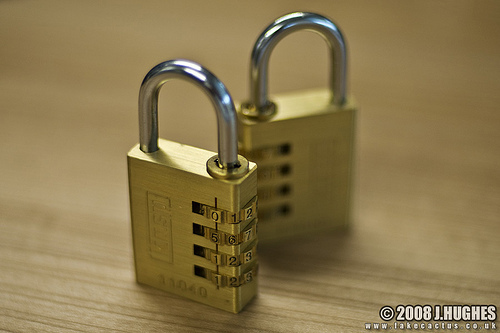

In [7]:
#Try to open first image
Image.open(path_list[random.sample(range(len(path_list)), 1)[0]])

In [8]:
#Construct label dictionary 
label_dict = {}
for idx, value in enumerate(set(label_list)):
    label_dict[value] = idx 
label_indices = [label_dict[label] for label in label_list]
num_classes = len(label_dict)
#Len of path must be the same of label len
assert len(label_indices) == len(path_list)

In [15]:
label_dict

{'n01698640': 4,
 'n01728920': 3,
 'n01729977': 5,
 'n02071294': 1,
 'n02672831': 2,
 'n02992529': 6,
 'n03075370': 0,
 'n04044716': 8,
 'n04081281': 7,
 'n04131690': 9}

In [12]:
#Nonostante le annotations non tutte le immagini sono a colori
uncorrect_images = 0
full_color_path_images = []
full_color_labels = []
for idx,p in enumerate(path_list):
    im = np.array(Image.open(p))
    if im.shape[-1] == 3:
        full_color_path_images.append(path_list[idx])
        full_color_labels.append(label_indices[idx])
    else:
        uncorrect_images += 1
    if uncorrect_images % 10 == 0:
        sys.stdout.write("\r"+str(uncorrect_images))
        sys.stdout.flush()

40

IndexError: tuple index out of range

### Checkpoint
Save file

In [12]:
checkpoint_df = pd.DataFrame(full_color_path_images,columns=['path'])
checkpoint_df['labels'] = full_color_labels
checkpoint_df.to_csv('checkpoint_df.csv')

In [9]:
checkpoint_df = pd.read_csv('checkpoint_df.csv')
full_color_path_images = list(checkpoint_df['path'])
full_color_labels = list(checkpoint_df['labels'])


In [14]:
assert len(full_color_path_images) == len(full_color_labels)
for idx,path in enumerate(full_color_path_images):
    current_label = path.split('/')[-1].split('_')[0]
    
    correct_label_idx = label_dict[current_label]
    current_label_idx = full_color_labels[idx]
    if correct_label_idx != current_label_idx:
        print("UNCORRECT IDX LABEL ASSIGNMENTS")

UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORREC

UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORRECT IDX LABEL ASSIGNMENTS
UNCORREC

In [10]:
'''
get_network_fn for returning the corresponding network function.

Se num_classes è da cambiare, impostare is_training a True

Ritorna la funzione definita nel corrispetivo file della rete
'''
model_name = 'inception_v4'
inception_net_fn = nets_factory.get_network_fn(model_name,
                                               num_classes=10,
                                               is_training = True
                                              )

'''with tf.device('/gpu:0'):
    sampl_input = tf.placeholder(tf.float32, [None, 300,300, 3], name='incpetion_input_placeholder')
    #Invocazione della model fn per la definizione delle variabili della rete
    #Usa questi tensori che sono quelli per i quali passa il modello
    #Necessario per ripristinare il grafo
    print(inception_net_fn(sampl_input))'''

"with tf.device('/gpu:0'):\n    sampl_input = tf.placeholder(tf.float32, [None, 300,300, 3], name='incpetion_input_placeholder')\n    #Invocazione della model fn per la definizione delle variabili della rete\n    #Usa questi tensori che sono quelli per i quali passa il modello\n    #Necessario per ripristinare il grafo\n    print(inception_net_fn(sampl_input))"

In [11]:
EPOCHS = 50
BATCH_SIZE = 16
#Serve per capire quando il generatore è passato a batch appartenenti a una nuova epoca 
BATCH_PER_EPOCH = np.ceil(len(path_list) / BATCH_SIZE)

def parse_single_image(filename_queue):
    #Dequeue a file name from the file name queue
    #filename, y = filename_queue.dequeue()
    #Non bisogna invocare il dequeue il parametro della funziona è già lo scodamento
    filename, y_numeric = filename_queue[0], filename_queue[1]
    #A y manca solo il one-hot
    y = tf.one_hot(y_numeric, num_classes)
    #y = y_numeric
    #Read image
    raw = tf.read_file(filename)
    #convert in jpg (in GPU!)
    jpeg_image = tf.image.decode_jpeg(raw)
    #Preprocessing with inception preprocessing
    #jpeg_image = tf.image.resize_images(jpeg_image, [300, 300], method=tf.image.ResizeMethod.BILINEAR)
    jpeg_image = inception_preprocessing.preprocess_for_eval(jpeg_image, 300, 300)
    jpeg_image = tf.reshape(jpeg_image, [300, 300, 3])
    
    #jpeg_image = inception_preprocessing.preprocess_image(jpeg_image, 300, 300, is_training=False)
    return jpeg_image, y
#jpeg_image = parse_single_image(filename_queue)

def get_batch(filenames, labels, batch_size, num_epochs=None):
    
    #Coda lettura file, slice_input_producer accetta una lista di liste (stessa dimensione)
    #Risultato dello scodamento è l'elemento corrente di ciascuna delle liste
    #Le liste sono rispettivamente la lista di file e la lista dei label
    filename_queue = tf.train.slice_input_producer([filenames, labels])
    
    #Lettura singolo record
    #jpeg_image,y,filename,y_numeric = parse_single_image(filename_queue)
    jpeg_image,y = parse_single_image(filename_queue)
    
    # min_after_dequeue defines how big a buffer we will randomly sample
    #   from -- bigger means better shuffling but slower start up and more
    #   memory used.
    # capacity must be larger than min_after_dequeue and the amount larger
    #   determines the maximum we will prefetch.  Recommendation:
    #   min_after_dequeue + (num_threads + a small safety margin) * batch_size
    min_after_dequeue = 10
    capacity = min_after_dequeue + 3 * batch_size
    
    #tensors è la lista dei tensori delle single feature e immagini. Esegue batch_size volte i tensori example e label per ottenere il batch
    #num_threads incrementa effettivamente l'utilizzo della CPU (confermato dal throughput visisible sul cloudera manager,
    #resta comunque un throughput lento ....
    example_batch = tf.train.shuffle_batch(
        tensors=[jpeg_image, y], batch_size=batch_size, capacity=capacity,
        min_after_dequeue=min_after_dequeue, allow_smaller_final_batch=True, num_threads=2)
    
    return example_batch

In [14]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'InceptionV4/Logits')

[<tf.Variable 'InceptionV4/Logits/Logits/weights:0' shape=(1536, 10) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Logits/Logits/biases:0' shape=(10,) dtype=float32_ref>]

In [13]:
#TF Graph, per ora recupera solamente un batch
global_step = tf.Variable(0, name='global_step', trainable=False)
with tf.device('/cpu:0'):
    with tf.name_scope('preprocessing') as scope:
        #x,y,filenames,y_numeric = get_batch(full_color_path_images, full_color_labels, batch_size=BATCH_SIZE)
        x,y = get_batch(full_color_path_images, full_color_labels, batch_size=BATCH_SIZE)

        #x = tf.contrib.layers.flatten(x)
        #flatten_x = tf.contrib.layers.flatten(x) 
    

with tf.device('/gpu:0'):
    #inception prelogits 
    inception_net_fn(x)
    #prelogits = tf.placeholder(tf.float32, [None, 1536], name='prelogits_placeholder')
    inception_logits = tf.get_default_graph().get_tensor_by_name("InceptionV4/Logits/Predictions:0") 

    with tf.variable_scope('train_op') as scope:
        # Define loss and optimizer
        targetvars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'InceptionV4/Logits')
        #Flatten output 
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=inception_logits, labels=y))
        #output = tf.reshape(output, [-1])
        #cost = tf.losses.absolute_difference(labels=y, predictions=output)
        optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost, var_list=targetvars, global_step=global_step)
        # Accuracy
        predictions = tf.argmax(inception_logits, 1)
        to_predict = tf.argmax(y, 1)
        correct_pred = tf.equal(predictions, to_predict)
        #correct_pred = tf.equal(tf.cast(tf.rint(output), tf.int32), y)
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

tf.summary.scalar('accuracy', accuracy)
tf.summary.scalar('loss', cost)

init = tf. global_variables_initializer()

merged_summeries = tf.summary.merge_all()

#GPU config
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
#Saver per restoring inception net
saver = tf.train.Saver()

with tf.Session(config=config) as sess:
    sess.run(init)
    sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter(TRAINING_CHECKPOINT_DIR,
                                   sess.graph)
    #Start populating the filename queue.
    coord = tf.train.Coordinator()
    #Senza questa chiamata non partono i thread per popolare la coda che permette di eseguire la read
    threads = tf.train.start_queue_runners(coord=coord)
    #Current epoch and step servono a capire quando cambiare epoca e quando fermarsi
    current_epoch = 0
    current_step = 0
    while current_epoch < EPOCHS: 
        #x_batch, y_batch, filenames_batch, y_numeric_batch = sess.run([x,y,filenames,y_numeric])
        x_batch, y_batch = sess.run([x,y])

        tf.summary.image(name='preprocess', tensor=x_batch)
        #for idx, f in enumerate(filenames_batch):
            #current_batch_label = str(f).split('/')[-1].split('_')[0]
            #correct_label_idx = label_dict[current_batch_label]
            #print("Label String {0}, label index {1}, expected label index {2}"
                  #.format(current_batch_label, y_numeric_batch[idx], correct_label_idx))
        #Forward pass nella incpetion net
        #inception_pre_logits = sess.run(tf.get_default_graph().get_tensor_by_name("InceptionV4/Logits/PreLogitsFlatten/Reshape:0"),
         #feed_dict={sampl_input: x_batch})
        sess.run(optimizer, feed_dict={x: x_batch, y: y_batch})
        #print(x_batch.shape)
        if current_step % 10 == 0:
            #print("Batch shape {}".format(x_batch.shape))
            print("Current step: {0}".format(current_step))
            train_loss, train_accuracy, batch_prediction, batch_to_predict, train_summ  = sess.run([cost,accuracy,predictions,
                                                                                                   to_predict,
                                                                                                   merged_summeries],
                                                               feed_dict={x: x_batch, y: y_batch})
            print("Batch predictions")
            print(batch_prediction)
            print("Batch targets")
            print(batch_to_predict)
            print("Loss: {0} accuracy {1}".format(train_loss, train_accuracy))
            writer.add_summary(train_summ, current_epoch * current_step + 1)
        #Cambiare epoca, raggiunto il massimo per l'epoca corrente
        if current_step == (BATCH_PER_EPOCH - 1):
            current_epoch += 1
            current_step = 0
            print("EPOCH {0}".format(current_epoch))
        #Epoche terminate -> chiudere
        if current_epoch >= EPOCHS:
            break

        if current_step == 0 and current_epoch == 0:
            writer.add_graph(sess.graph)
        #train_summary = sess.run([merged_summeries], feed_dict={x: x_batch, y: y_batch})
        #writer.add_summary(train_summary, current_step)
        current_step +=  1
    #for i in range(10):
        #converted_im = sess.run(jpeg_image)
        #print(converted_im.shape)
        
    #Chiusura del coordinator (chiudi i thread di lettura)
    coord.request_stop()
    coord.join(threads)
    sess.close()

INFO:tensorflow:Scale of 0 disables regularizer.
Current step: 0
Batch predictions
[6 3 9 5 6 3 3 3 3 6 5 5 9 3 3 3]
Batch targets
[1 4 5 2 9 9 4 9 3 8 5 0 9 3 8 1]
Loss: 2.291335344314575 accuracy 0.25
Current step: 10
Batch predictions
[9 9 9 9 9 9 9 9 9 9 9 5 9 9 9 9]
Batch targets
[6 0 1 5 2 9 3 9 9 8 0 9 8 0 4 7]
Loss: 2.2719900608062744 accuracy 0.1875
Current step: 20
Batch predictions
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
Batch targets
[2 9 2 4 8 8 8 0 7 5 9 1 7 6 3 2]
Loss: 2.3136374950408936 accuracy 0.125
Current step: 30
Batch predictions
[4 4 4 9 4 4 9 9 4 9 4 4 4 4 4 9]
Batch targets
[4 0 1 9 7 5 7 2 9 0 6 8 3 2 6 0]
Loss: 2.2900280952453613 accuracy 0.125
Current step: 40
Batch predictions
[4 9 4 4 4 2 4 4 4 4 4 4 4 4 4 4]
Batch targets
[8 9 1 4 8 2 0 0 3 4 7 9 3 8 8 0]
Loss: 2.2484540939331055 accuracy 0.25
Current step: 50
Batch predictions
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Batch targets
[6 2 1 7 4 0 3 6 6 9 3 1 6 5 1 9]
Loss: 2.341942310333252 accuracy 0.0625
Current step

KeyboardInterrupt: 

In [ ]:
#TF Graph, per ora recupera solamente un batch
global_step = tf.Variable(0, name='global_step', trainable=False)
with tf.device('/cpu:0'):
    with tf.name_scope('preprocessing') as scope:
        #x,y,filenames,y_numeric = get_batch(full_color_path_images, full_color_labels, batch_size=BATCH_SIZE)
        x,y = get_batch(full_color_path_images, full_color_labels, batch_size=BATCH_SIZE)

        #x = tf.contrib.layers.flatten(x)
        #flatten_x = tf.contrib.layers.flatten(x) 
    

with tf.device('/gpu:0'):
    #inception prelogits 
    inception_net_fn(x)
    #prelogits = tf.placeholder(tf.float32, [None, 1536], name='prelogits_placeholder')
    prelogits = tf.get_default_graph().get_tensor_by_name("InceptionV4/Logits/PreLogitsFlatten/Reshape:0") 

with tf.device('/gpu:0'):
    with tf.variable_scope('trainable'):
        with tf.variable_scope('hidden') as scope:
            '''hidden = tf.layers.dense(
                conv,
                units=512,
                activation=tf.nn.relu        
            )'''
            
        #Kenerl init None = glooroot initializers (sttdev = 1/sqrt(n))
        with tf.variable_scope('readout') as scope:
            output = tf.layers.dense(
                prelogits,
                units=num_classes,
                kernel_initializer=tf.truncated_normal_initializer(stddev=0.01),
                activation=None
            )

    with tf.variable_scope('train_op') as scope:
        # Define loss and optimizer
        targetvars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "trainable")
        #Flatten output 
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y))
        #output = tf.reshape(output, [-1])
        #cost = tf.losses.absolute_difference(labels=y, predictions=output)
        optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost, var_list=targetvars,global_step=global_step)
        # Accuracy
        predictions = tf.argmax(output, 1)
        to_predict = tf.argmax(y, 1)
        correct_pred = tf.equal(predictions, to_predict)
        #correct_pred = tf.equal(tf.cast(tf.rint(output), tf.int32), y)
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

tf.summary.scalar('accuracy', accuracy)
tf.summary.scalar('loss', cost)

init = tf. global_variables_initializer()

merged_summeries = tf.summary.merge_all()

In [14]:
#GPU config
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
#Saver per restoring inception net
saver = tf.train.Saver()

with tf.Session(config=config) as sess:
    sess.run(init)
    sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter(TRAINING_CHECKPOINT_DIR,
                                   sess.graph)
    #Start populating the filename queue.
    coord = tf.train.Coordinator()
    #Senza questa chiamata non partono i thread per popolare la coda che permette di eseguire la read
    threads = tf.train.start_queue_runners(coord=coord)
    #Current epoch and step servono a capire quando cambiare epoca e quando fermarsi
    current_epoch = 0
    current_step = 0
    while current_epoch < EPOCHS: 
        #x_batch, y_batch, filenames_batch, y_numeric_batch = sess.run([x,y,filenames,y_numeric])
        x_batch, y_batch = sess.run([x,y])

        tf.summary.image(name='preprocess', tensor=x_batch)
        #for idx, f in enumerate(filenames_batch):
            #current_batch_label = str(f).split('/')[-1].split('_')[0]
            #correct_label_idx = label_dict[current_batch_label]
            #print("Label String {0}, label index {1}, expected label index {2}"
                  #.format(current_batch_label, y_numeric_batch[idx], correct_label_idx))
        #Forward pass nella incpetion net
        #inception_pre_logits = sess.run(tf.get_default_graph().get_tensor_by_name("InceptionV4/Logits/PreLogitsFlatten/Reshape:0"),
         #feed_dict={sampl_input: x_batch})
        sess.run(optimizer, feed_dict={x: x_batch, y: y_batch})
        #print(x_batch.shape)
        if current_step % 10 == 0:
            #print("Batch shape {}".format(x_batch.shape))
            print("Current step: {0}".format(current_step))
            train_loss, train_accuracy, batch_prediction, batch_to_predict, train_summ  = sess.run([cost,accuracy,predictions,
                                                                                                   to_predict,
                                                                                                   merged_summeries],
                                                               feed_dict={x: x_batch, y: y_batch})
            print("Batch predictions")
            print(batch_prediction)
            print("Batch targets")
            print(batch_to_predict)
            print("Loss: {0} accuracy {1}".format(train_loss, train_accuracy))
            writer.add_summary(train_summ, current_epoch * current_step + 1)
        #Cambiare epoca, raggiunto il massimo per l'epoca corrente
        if current_step == (BATCH_PER_EPOCH - 1):
            current_epoch += 1
            current_step = 0
            print("EPOCH {0}".format(current_epoch))
        #Epoche terminate -> chiudere
        if current_epoch >= EPOCHS:
            break

        if current_step == 0 and current_epoch == 0:
            writer.add_graph(sess.graph)
        #train_summary = sess.run([merged_summeries], feed_dict={x: x_batch, y: y_batch})
        #writer.add_summary(train_summary, current_step)
        current_step +=  1
    #for i in range(10):
        #converted_im = sess.run(jpeg_image)
        #print(converted_im.shape)
        
    #Chiusura del coordinator (chiudi i thread di lettura)
    coord.request_stop()
    coord.join(threads)
    sess.close()

Current step: 0
Batch predictions
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Batch targets
[7 3 5 8 0 4 6 0 7 7 7 1 9 8 1 5 9 9 2 4 5 6 9 5 6 9 6 8 1 2 6 2]
Loss: 37.132667541503906 accuracy 0.125
Current step: 10
Batch predictions
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Batch targets
[5 8 1 8 0 4 9 4 1 5 9 3 0 5 9 4 1 0 3 9 1 2 7 9 7 3 4 6 7 5 3 6]
Loss: 218.28733825683594 accuracy 0.125
Current step: 20
Batch predictions
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
Batch targets
[5 6 6 2 5 6 6 4 8 3 6 8 3 6 9 2 1 9 0 0 2 2 6 0 1 7 2 6 4 3 3 7]
Loss: 122.92801666259766 accuracy 0.0625
Current step: 30
Batch predictions
[6 6 6 6 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Batch targets
[5 6 9 5 5 6 2 0 2 2 7 8 7 3 9 6 2 9 3 0 5 0 3 7 0 0 6 6 3 9 2 3]
Loss: 30.82172393798828 accuracy 0.1875
Current step: 40
Batch predictions
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Batch targets
[

KeyboardInterrupt: 